# Health Insurance Cross Sell Prediction 🏠 🏥
Predict Health Insurance Owners' who will be interested in Vehicle Insurance


**Best results f1_score : 0.4182915181587346 % accuracy : 0.8214481948289034**


## Overview 
### 1) Context

### 2) Describtion 

### 3) Used Python Libraries

### 4) Exploratory Data Analysis (EDA) 

### 5) Data Normalization

### 6) Feature Selection with Visualization

### 7) Feature Selection with Hypothesis test 

### 8) Model Buliding 

### 9) Receiver Operating Characteristic Score (ROC AUC) 

### 10) Conclusion 

### 11) Applying Algorithm 

## Context
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.


![](https://autonexa.com/wp-content/uploads/2018/08/INS-1-780x405.jpg)

## Data Description
* **Train Data**


1. id: Unique ID for the customer
2. Gender: Gender of the customer
3. Age: Age of the customer
4. Driving_License:  **0** : Customer does not have DL, **1** : Customer already has DL
5. Region_Code: Unique code for the region of the customer
6. Previously_Insured: **1** : Customer already has Vehicle Insurance,**0**: Customer doesn't have Vehicle Insurance
7. Vehicle_Age: Age of the Vehicle
8. Vehicle_Damage: **1** : Customer got his/her vehicle damaged in the past.**0**: Customer didn't get his/her vehicle damaged in he past.
9. Annual_Premium: The amount customer needs to pay as premium in the year
10. PolicySalesChannel: Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. Vintage: Number of Days, Customer has been associated with the company
12. Response: 1 : Customer is interested, 0 : Customer is not interested



*  **Test Data**


1. id: Unique ID for the customer
2. Gender: Gender of the customer
3. Age: Age of the customer
4. Driving_License:  **0** : Customer does not have DL, **1** : Customer already has DL
5. Region_Code: Unique code for the region of the customer
6. Previously_Insured: **1** : Customer already has Vehicle Insurance,**0**: Customer doesn't have Vehicle Insurance
7. Vehicle_Age: Age of the Vehicle
8. Vehicle_Damage: **1** : Customer got his/her vehicle damaged in the past. **0**: Customer didn't get his/her vehicle damaged in he past.
9. Annual_Premium: The amount customer needs to pay as premium in the year
10. PolicySalesChannel: Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. Vintage: Number of Days, Customer has been associated with the company



* **Submission**


1. id: Unique ID for the customer
2. Response: **1** : Customer is interested, **0** : Customer is not interested


## Evaluation Metric
The evaluation metric for this hackathon is ROC_AUC score.

## Public and Private split
The public leaderboard is based on 40% of test data, while final rank would be decided on remaining 60% of test data (which is private leaderboard)

## Guidelines for Final Submission
Please ensure that your final submission includes the following:

1. Solution file containing the predicted response of the customer (Probability of response 1)
2. Code file for reproducing the submission, note that it is mandatory to submit your code for a valid final submission

## Used Python Libraries

In [1]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Know Dataset Nature
1. head() : It is used to get the **first 5 rows** of the dataframe.
2. tail() : It is used to get the **last 5 rows** of the dataframe.
3. describe() : It is used to view some **basic statistical details** like percentile, mean, std etc.
4. info() : It is used to print a **concise summary** of a DataFrame. including the **index dtype and column dtypes, non-null values and memory usage.**

In [2]:
train_data = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
test_data = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/test.csv')

In [3]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## Light Data Exploration
### 1) For numeric data 
* Made histograms to understand distributions 
* Corrplot 
* Pivot table comparing survival rate across numeric variables 


### 2) For Categorical Data 
* Made bar charts to understand balance of classes 
* Made pivot tables to understand relationship with survival 

In [7]:
train_data_cat = train_data[['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']]
train_data_num = train_data[['Age','Region_Code','Annual_Premium','Vintage','Policy_Sales_Channel']]

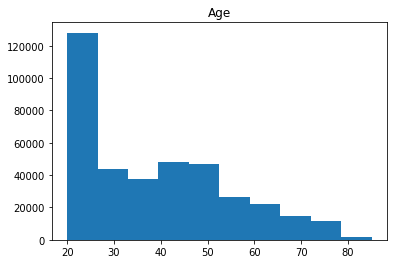

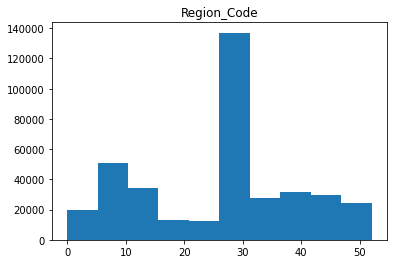

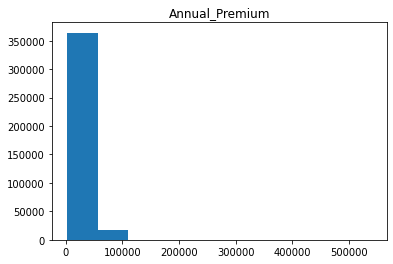

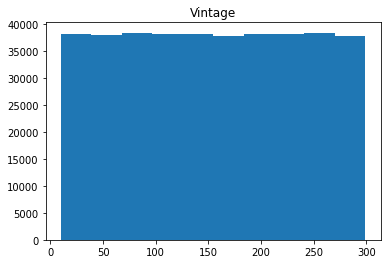

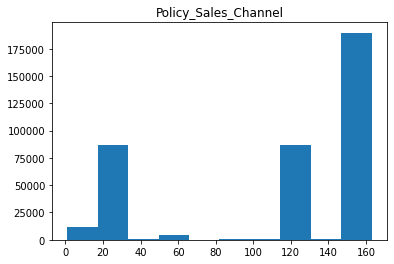

In [8]:
for i in train_data_num.columns:
    plt.hist(train_data_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

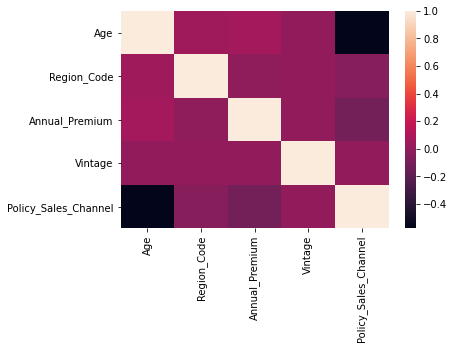

In [9]:
sns.heatmap(train_data_num.corr())

In [10]:
pd.pivot_table(train_data, index='Response', values=['Age','Region_Code','Annual_Premium','Vintage','Policy_Sales_Channel'])

,Age,Annual_Premium,Policy_Sales_Channel,Region_Code,Vintage
Response,,,,,
0,38.178227,30419.160276,114.851040,26.336544,154.380243
1,43.435560,31604.092742,91.869086,26.762963,154.112246


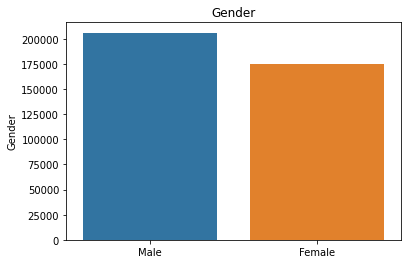

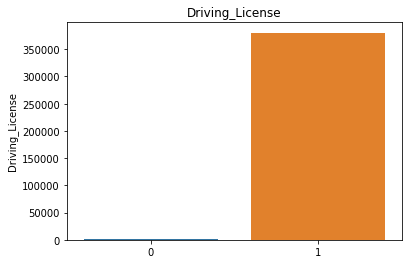

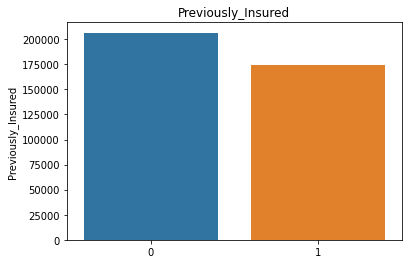

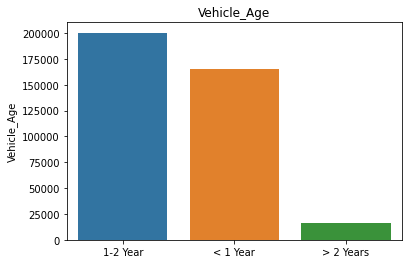

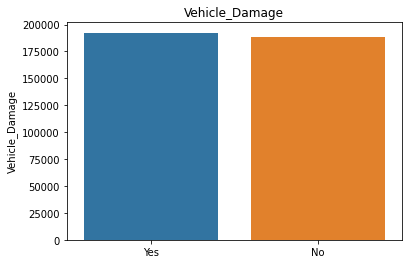

In [11]:
for i in train_data_cat.columns:
    sns.barplot(train_data_cat[i].value_counts().index,train_data_cat[i].value_counts()).set_title(i)
    plt.show()

In [12]:
for i in train_data_cat:
    print(pd.pivot_table(train_data,index='Response',columns=i, values='Age'))
    print("=="*20)

Gender       Female       Male
Response                      
0         35.692945  40.373375
1         42.235634  44.200526
Driving_License          0          1
Response                             
0                65.952010  38.114043
1                59.073171  43.421822
Previously_Insured          0          1
Response                                
0                   42.162760  34.525781
1                   43.461828  35.696203
Vehicle_Age   1-2 Year   < 1 Year  > 2 Years
Response                                    
0            49.761410  24.730594  56.046351
1            45.572344  26.819217  53.069332
Vehicle_Damage         No        Yes
Response                            
0               34.625031  42.725282
1               35.969450  43.595893


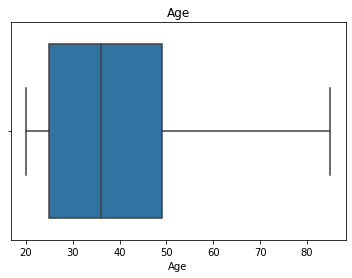

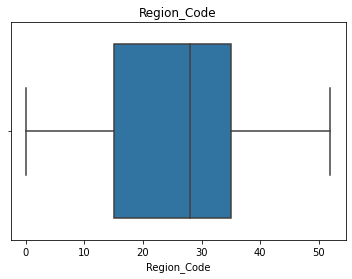

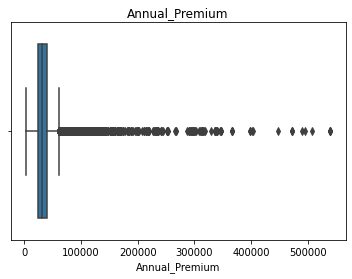

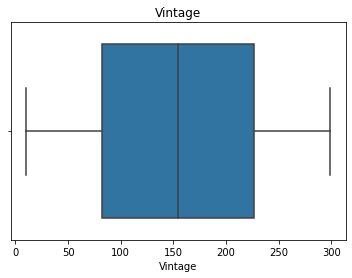

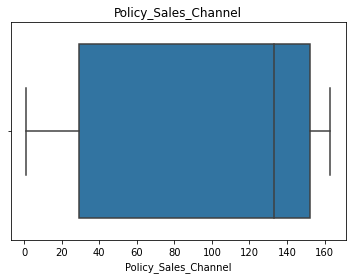

In [13]:
# dealing with outliers values
for i in train_data_num.columns:
    sns.boxplot(train_data_num[i])
    plt.title(i)
    plt.show()

## Data Normalization

1. interquartile range: It is hlep us to find **outlier values** in th columns.
2. outlinefree() : It is a customise function that help us to figureout and work on outlier values in columns. meanly, it is used to **remove outlires** values from dataset.    
3. for-loop: with the help of for-loop, we are checking the **outlinefree()** function worked properly or not.

In [14]:
def outlinefree(dataCol):     
      
    sorted(dataCol)                          # sort column
    Q1,Q3 = np.percentile(dataCol,[25,75])   # getting 25% and 75% percentile
    IQR = Q3-Q1                              # getting IQR 
    LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
    UpperRange = Q3+(1.5 * IQR)              # getting Upperrange 
    
    colname = dataCol.tolist()               # convert column into list  
    newlist =[]                              # empty list for store new values
    for i in range(len(colname)):
        
        if colname[i] > UpperRange:          # list number > Upperrange 
            colname[i] = UpperRange          # then number = Upperrange
            newlist.append(colname[i])       # append value to empty list
        elif colname[i] < LowerRange:        # list number < Lowrange 
            colname[i] = LowerRange          # then number = Lowrange
            newlist.append(colname[i])       # append value to empty list 
        else:
            colname[i]                       # list number
            newlist.append(colname[i])       # append value to empty list
            
        

    return newlist

In [15]:
for i in range(len(train_data_num.columns)):
    new_list =  outlinefree(train_data.loc[:,train_data_num.columns[i]]) # retrun new list
    train_data.loc[:,train_data_num.columns[i]] = new_list 

In [16]:
train_data_num_new = train_data[['Age','Region_Code','Annual_Premium','Vintage','Policy_Sales_Channel']]

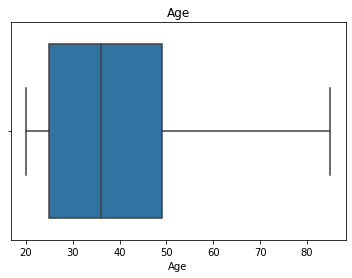

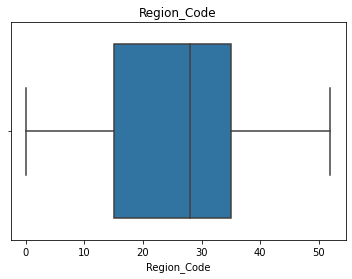

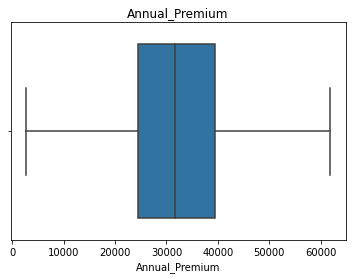

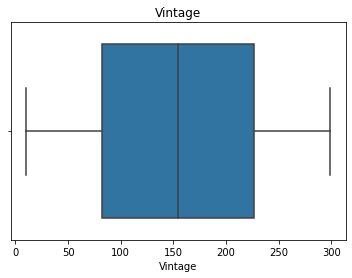

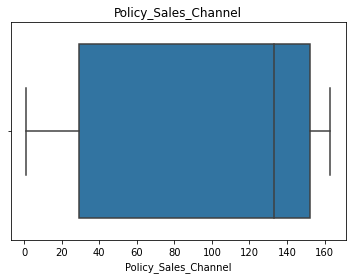

In [17]:
# dealing with outliers values
for i in train_data_num_new.columns:
    sns.boxplot(train_data_num_new[i])
    plt.title(i)
    plt.show()

In [18]:
train_data.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [19]:
train_data.replace(['Female','Male','1-2 Year','< 1 Year','> 2 Years'],[0,1,'1-2','<1Year','>2Years'],inplace=True)
test_data.replace(['Female','Male','1-2 Year','< 1 Year','> 2 Years'],[0,1,'1-2','<1Year','>2Years'],inplace=True)

In [20]:
train_data.Vehicle_Age.value_counts()

1-2        200316
<1Year     164786
>2Years     16007
Name: Vehicle_Age, dtype: int64

## Feature Selection

1. seaborn.pairplot(): It is help to figure-out relation between features and label.

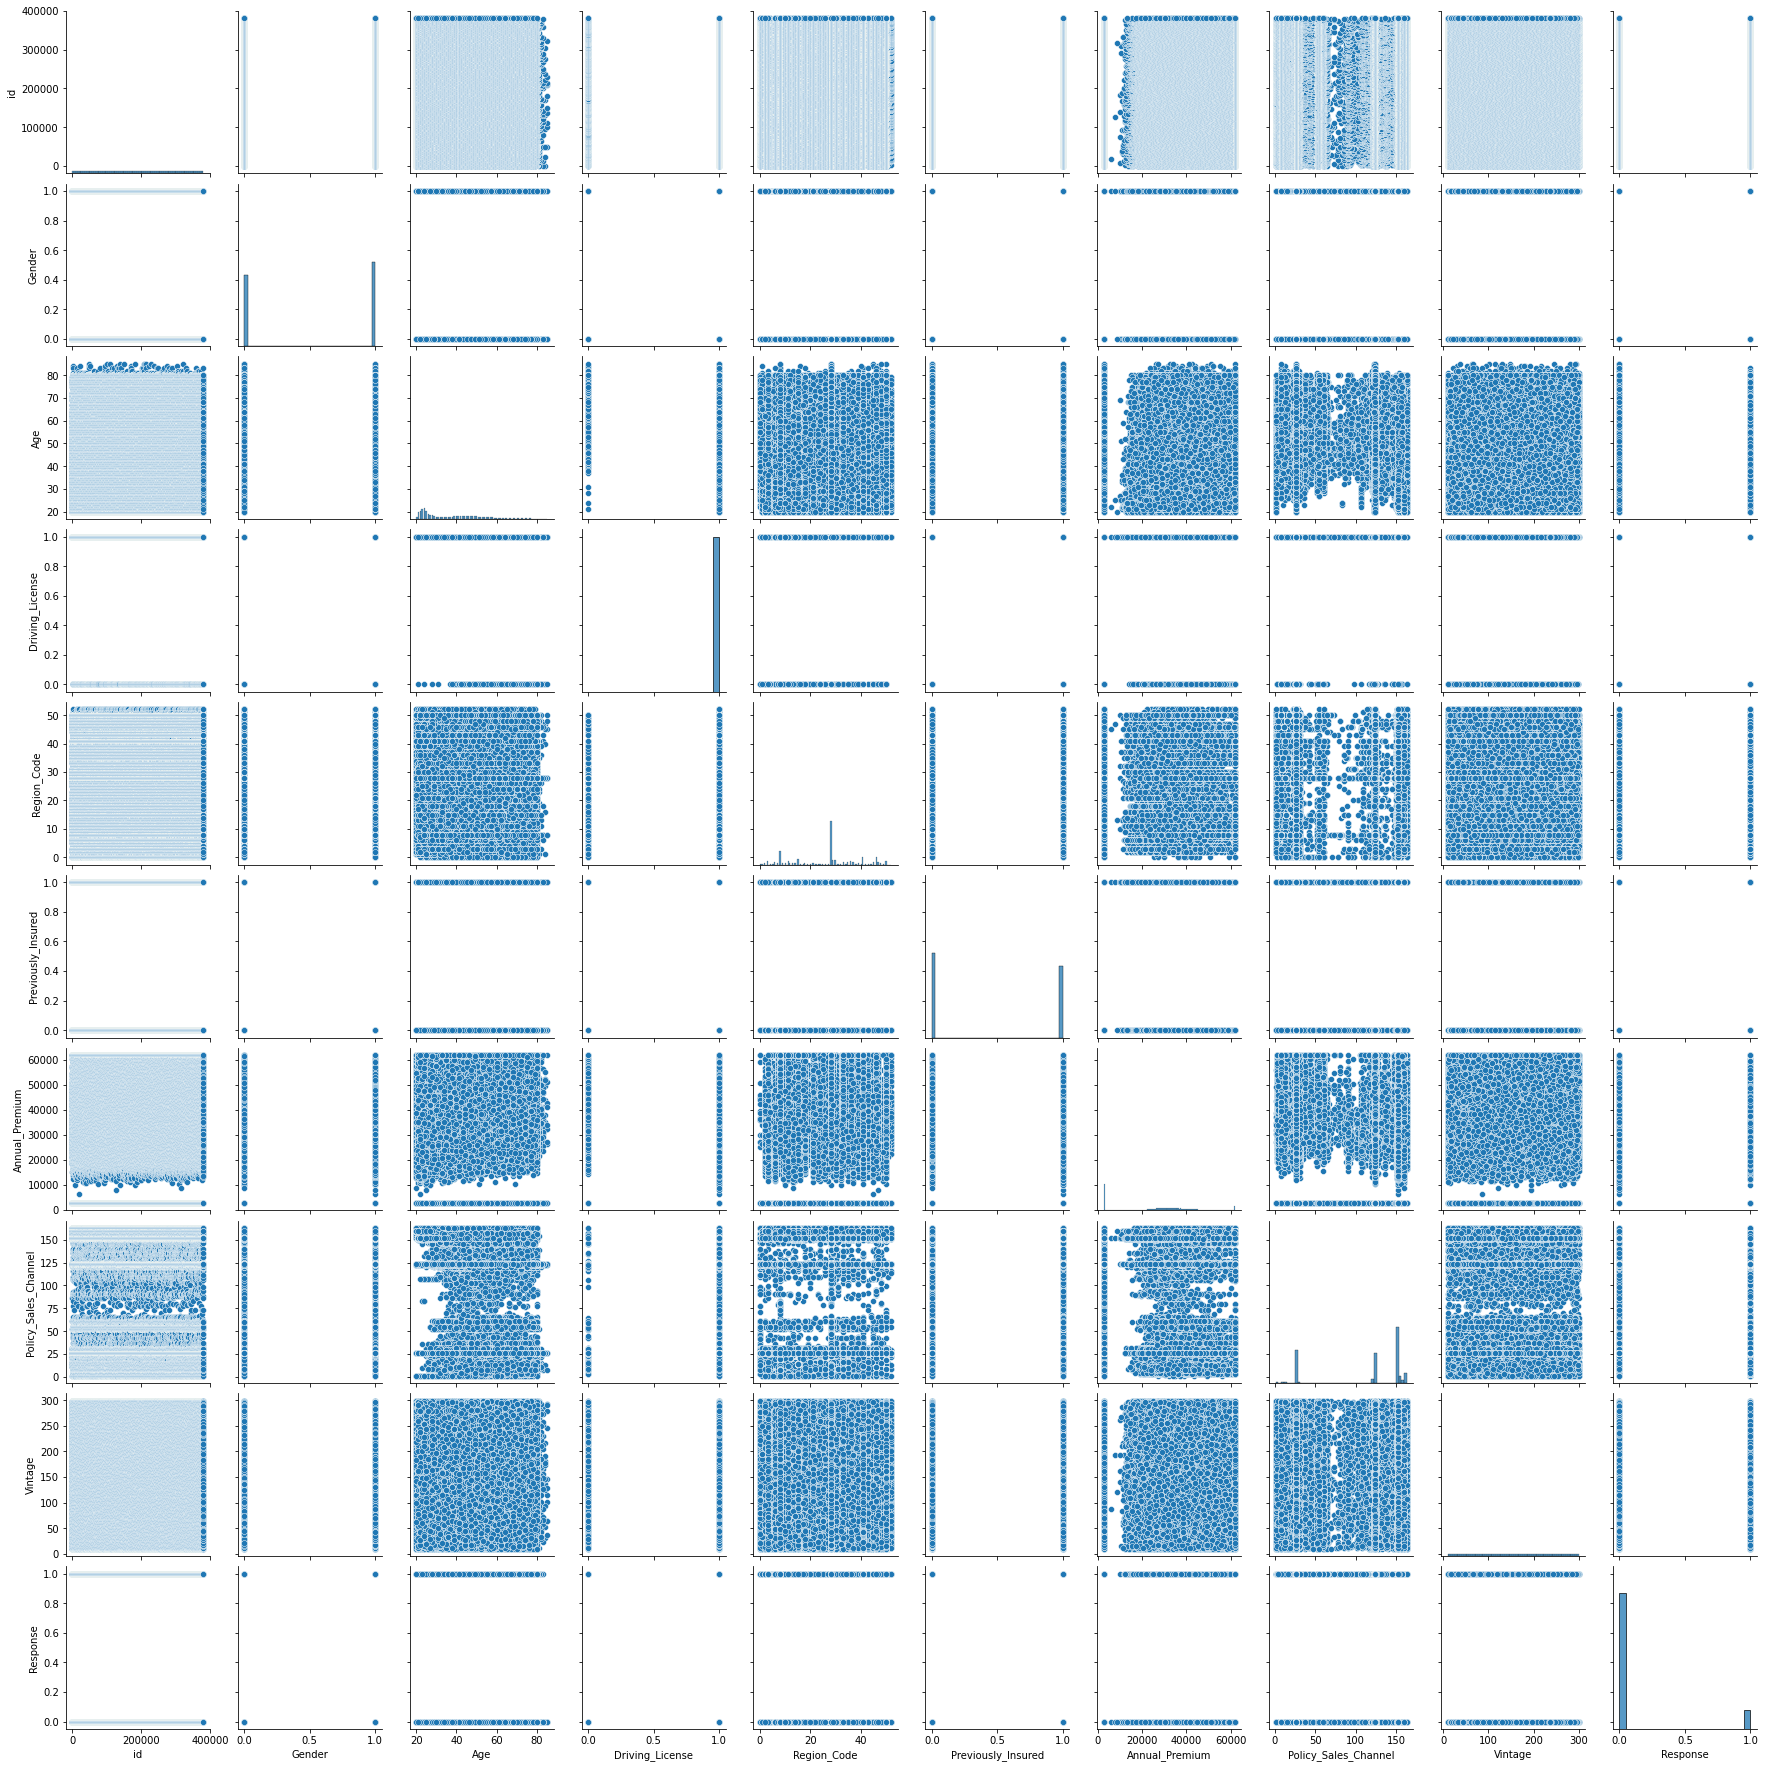

In [21]:
sns.pairplot(train_data)

## Feature Selection with hypothesis test
1. Chi-test: It is help to figure-out relation between features and label with **"pvalue <= 0.1"**

In [22]:
ct = pd.crosstab(train_data['Vintage'],train_data['Response'])
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)
print("pvalue : ",pvalue)

if pvalue <= 0.1:
    print("Alternate Hypothesis passed. Vintage and Response have Relationship")
else:
    print("Null hypothesis passed. Vintage and Response doesnot have  Relationship")

pvalue :  0.8862939415964791
Null hypothesis passed. Vintage and Response doesnot have  Relationship


In [23]:
train_data_1 = train_data.loc[:,['Response','Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel']]

In [24]:
final_train_data = pd.get_dummies(train_data_1)

In [25]:
final_train_data.columns

Index(['Response', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vehicle_Age_1-2', 'Vehicle_Age_<1Year', 'Vehicle_Age_>2Years',
       'Vehicle_Damage_No', 'Vehicle_Damage_Yes'],
      dtype='object')

In [26]:
features = final_train_data.iloc[:,1:].values
label = final_train_data.iloc[:,0].values

## Model Buliding
here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

1. Logistic Regression (f1 score: 0.0 )
2. **naive bayes (f1 score: 0.4182915181587346)**
3. DecisionTreeClassifier (f1 score: 0.0)
4. RandomForestClassifier (f1 score: 0.0)

In [27]:
#pip install scikit-learn  -U

In [28]:
#------------------------LogisticRegression-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=70)

classimodel= LogisticRegression(solver='liblinear')  
classimodel.fit(X_train, y_train)
trainscore =  classimodel.score(X_train,y_train)
testscore =  classimodel.score(X_test,y_test)  

y_predlogi =  classimodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predlogi),'\n')
print(confusion_matrix(y_test, y_predlogi))

 f1 score:  0.0 

[[83680     0]
 [11598     0]]


In [29]:
print(' precision score: ',precision_score(y_test, y_predlogi),'\n')
print(' recall score: ',recall_score(y_test, y_predlogi),'\n')
print(classification_report(y_test, y_predlogi))

 precision score:  0.0 

 recall score:  0.0 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     83680
           1       0.00      0.00      0.00     11598

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



In [30]:
#------------------------------naive bayes---------------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=94)

NBmodel = GaussianNB()  
NBmodel.fit(X_train, y_train) 

trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)  

y_predNB =  NBmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predNB),'\n')
print(confusion_matrix(y_test, y_predNB))

 f1 score:  0.4182915181587346 

[[61329 22099]
 [ 2872  8978]]


In [31]:
print(' precision score: ',precision_score(y_test, y_predNB),'\n')
print(' recall score: ',recall_score(y_test, y_predNB),'\n')
print(classification_report(y_test, y_predNB))

 precision score:  0.2888953245165235 

 recall score:  0.7576371308016878 

              precision    recall  f1-score   support

           0       0.96      0.74      0.83     83428
           1       0.29      0.76      0.42     11850

    accuracy                           0.74     95278
   macro avg       0.62      0.75      0.62     95278
weighted avg       0.87      0.74      0.78     95278



In [32]:
#------------------------Decision Tree-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=34)

DTmodel=  DecisionTreeClassifier(criterion = 'entropy',splitter = 'random',max_depth=4)  
DTmodel.fit(X_train, y_train)
trainscore =  DTmodel.score(X_train,y_train)
testscore =  DTmodel.score(X_test,y_test)  

y_pred =  DTmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  0.0 

[[83725     0]
 [11553     0]]


In [33]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  0.0 

 recall score:  0.0 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     83725
           1       0.00      0.00      0.00     11553

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



In [34]:
#------------------------Random Forest-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=2)

RFmodel=  RandomForestClassifier(criterion='entropy',max_depth=4) 
RFmodel.fit(X_train, y_train)
trainscore =  RFmodel.score(X_train,y_train)
testscore =  RFmodel.score(X_test,y_test)  

y_pred =  RFmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  0.0 

[[83790     0]
 [11488     0]]


In [35]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  0.0 

 recall score:  0.0 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     83790
           1       0.00      0.00      0.00     11488

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



## Receiver Operating Characteristic Score (ROC AUC)
here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

1. Logistic Regression (auc: 0.8118786282323492)
2. naive bayes (auc: 0.8214481948289034)
3. DecisionTreeClassifier (auc: 0.829889187907877)
4. **RandomForestClassifier (auc: 0.845225109832536)**

0.5975158330506516


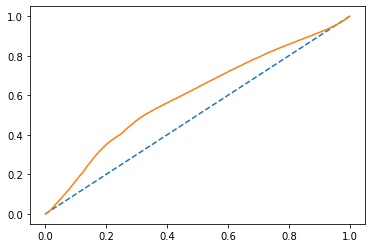

In [36]:
#-------------------------------------- LogisticRegression -------------------------------------
probabilityValues = classimodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.8214481948289034


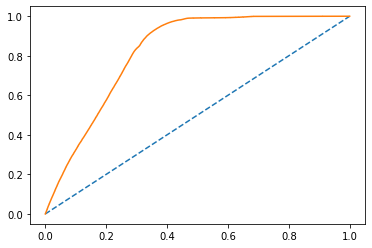

In [37]:
#-------------------------------------- naive bayes -------------------------------------
probabilityValues = NBmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.8183773243478814


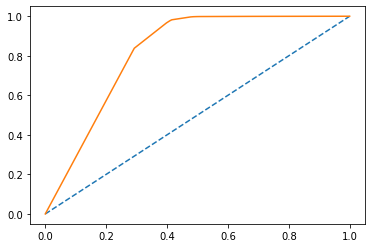

In [38]:
#-------------------------------------- Decision Tree -------------------------------------
probabilityValues = DTmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.8441908498875915


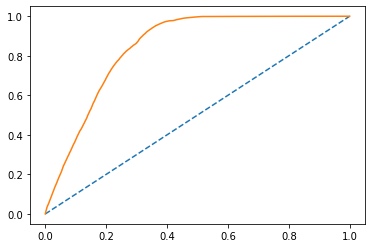

In [39]:
#-------------------------------------- Random Forest -------------------------------------
probabilityValues = RFmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

## Conclusion
I will choose a **naive bayes algorithm** for this dataset.

**naive bayes score**

1. **f1_score: 0.4182915181587346**
2. **auc: 0.8214481948289034**

## Applying Algorithm
1. we have to separet relational columns from the test dataset that will be columns assign to a new dataset.
2.  now we are ready for applying the decision tree algorithm on the test dataset.
3. now we have model-predicted prices and we can assign a price column to the test dataset.

In [40]:
finaltestdata = test_data.loc[:,['Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel']]

In [41]:
final_test_data = pd.get_dummies(finaltestdata)

In [42]:
final_test_data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vehicle_Age_1-2',
       'Vehicle_Age_<1Year', 'Vehicle_Age_>2Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [43]:
 Response = NBmodel.predict(final_test_data)

In [44]:
len(Response)

127037

In [45]:
test_data.shape

(127037, 11)

In [46]:
test_data['Response'] = Response

In [47]:
submission = test_data.loc[:,['id','Response']]

In [48]:
submission

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,1
127034,508144,0
127035,508145,0
